# Scatter Matrix

In [1]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

In [2]:
conn = sqlite3.connect("../../data/checking-logs.sqlite")
ab_df = pd.read_csv("../../data/ab-test.csv")

In [3]:
test_uids = list(ab_df[ab_df["group"] == "test"]["uid"])

In [17]:
q = "SELECT uid, COUNT(*) AS num_commits FROM checker WHERE uid IN (" \
    + str(test_uids)[1:len(str(test_uids))-1]\
    +") AND labname <> 'project1' GROUP BY uid"
commit_count = pd.io.sql.read_sql(q, conn)

In [18]:
q = "SELECT uid, COUNT(*) AS pageviews FROM pageviews WHERE uid IN (" \
    + str(test_uids)[1:len(str(test_uids))-1]\
    +") GROUP BY uid"
pageviews = pd.io.sql.read_sql(q, conn)

In [34]:
avg_diff = ab_df[(ab_df["group"] == "test") & (ab_df['time'] == 'after')][['uid', 'diff']]
avg_diff.rename(axis = 1, mapper = {"diff":"avg_diff"}, inplace=True)

In [35]:
final_df = avg_diff.merge(pageviews, on = 'uid').merge(commit_count, on = 'uid')

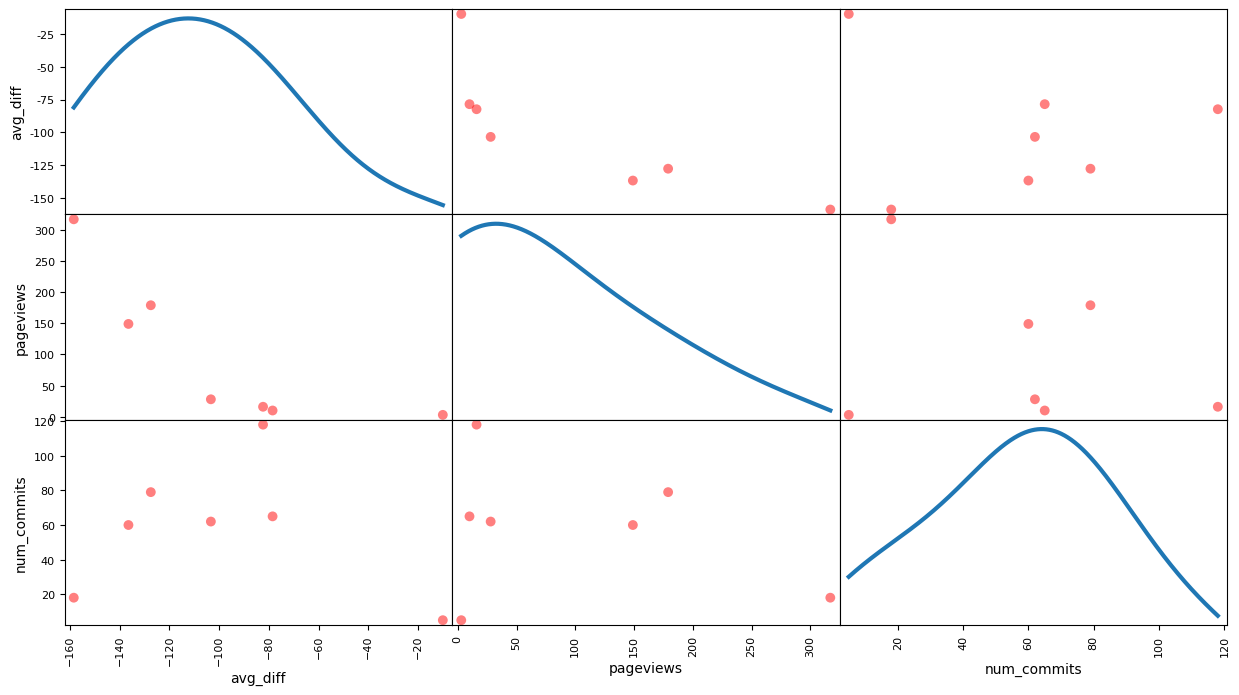

In [42]:
scatter_matrix(final_df, figsize=(15, 8),
               s = 200,
               c = 'red',
               diagonal='kde',
               density_kwds={'linewidth': 3}
               );

### “Can we say that if a user has a low number of pageviews then they likely have a low number of commits?” The answer: yes or no.
No
### “Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline?” The answer: yes or no.
Yes
### “Can we say that there are many users with a low number of commits and a few with a high number of commits”? The answer: yes or no.
No
### “Can we say that there are many users with a small average difference and a few with a large average difference”? The answer: yes or no.
Yes

In [43]:
conn.close()